# Group Assignment, M1.
## Group Members:
  Lasse Hede,
  Kristian Stavad,
  Rasmus Simmelsgaard Hye
### ----------------------------------------------

**Subject:** Mushroom classification through machine learning techniques 


In [0]:
#Import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [39]:
#For our dataset, we define the headers, because they have an un-logic header
#when loading in the .csv file from url. (like 'x' as 'cap-shape').
column_names = ['class',
                'cap-shape',
                'cap-surface',
                'cap-color',
                'bruises?',
                'odor',
                'gill-attachment',
                'gill-spacing',
                'gill-size',
                'gill-color',
                'stalk-shape',
                'stalk-root',
                'stalk-surface-above-ring',
                'stalk-surface-below-ring',
                'stalk-color-above-ring',
                'stalk-color-below-ring',
                'veil-type',
                'veil-color',
                'ring-number',
                'ring-type',
                'spore-print-color',
                'population',
                'habitat']

#Read in .CSV file and display the first five columns.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
data = pd.read_csv(url, names=column_names)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


## PREPROCESSING

In [40]:
#Check the info of the dataset, to see if there are missing values etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises?                    8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [41]:
#Check if dataset contains null-values
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [42]:
#The column 'class' consists of a label of either 'p' for poisonous, or 'e' 
#for edible. 
data['class'].unique()

array(['p', 'e'], dtype=object)

In [43]:
#Data.shape tells us the shape of the dataframe. In this dataframe we got 8124 
#observations, and 23 features. 
data.shape

(8124, 23)

In [44]:
#All the data in the dataframe, contains string values. For easier to be able to
#calculate using the data-observations, we convert them to integer values.
#We do this with LabelEncoder function.
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

#we fit_transform each column to labelencoder.
for col in data.columns:
  data[col] = labelencoder.fit_transform(data[col])

#print the dataset, to see if the data has been encoded.
data.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [45]:
#Convert the 'class' column from integer values to a boolean representation of 
#whether the mushroom is poisonous or not.
data['class'] = data['class'].astype('bool')

#Print the dataset, to see if 'class' column holds a boolean value for
#poisonous or edible mushrooms.
data.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,True,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,False,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,False,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,True,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,False,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [46]:
#Run data.describe() to get a glimpse of the data.
data.describe()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [47]:
#This shows us, that the column 'veil-type' is always 0. Therefore we can 
#drop this column, since it holds no values. We use inplace=True to
#impact and make the changes to the original dataset.
data.drop('veil-type', axis=1, inplace=True)

#Print the dataset, to see if 'veil-type' column is removed.
data.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,True,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,False,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,False,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,True,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,False,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


In [48]:
#We want to store the poisonous and edible mushroom observations in the two 
#variables 'poisonous' and 'edible' and print the length of each, to see how
#many poisonous and edible mushrooms are in the dataset.
poisonous = data[data['class'] == True]
edible = data[data['class'] == False]
print(len(poisonous))
print(len(edible))

#This shows us there are 3916 poisonous and 4208 edible mushrooms in the dataset.

3916
4208


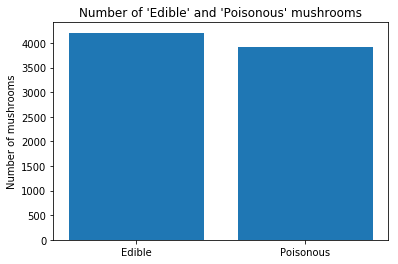

In [49]:
#We define the two mushroom types
types = ('Edible', 'Poisonous')

#Position 'Edible' first, 'Poisonous' as second.
y_pos = np.arange(len(types))

#Define 'numbers' as the number of 'edible' and 'poisonous' mushrooms.
numbers = [len(edible), len(poisonous)]

#Plot as barchart using matplotlib, with types and numbers of mushrooms.
plt.bar(y_pos, numbers)

#Set x ticks as 'Edible' and 'Poisonous'
plt.xticks(y_pos, types)

#Set y-label and title of visualization.
plt.ylabel("Number of mushrooms")
plt.title("Number of 'Edible' and 'Poisonous' mushrooms")

#Show barchart.
plt.show()

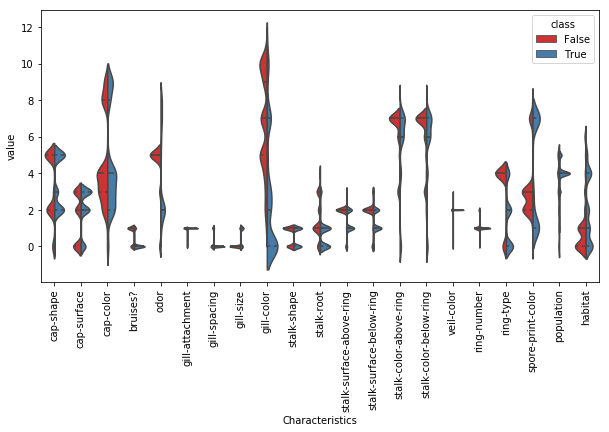

In [50]:
#For further investigation we create a violin-plot, to see if there are any 
#correlation between edible and poisonous characteristics in the 
#mushroom dataset.

#We create 'data_div' which melts the dataset, 'class' column and var_name 
#as 'Characteristics'.
data_div = pd.melt(data, "class", var_name="Characteristics")

#'fig' and 'ax' is created as subplot with figsize(10,5).
fig, ax = plt.subplots(figsize=(10,5))

#Now we create 'p' as Seaborn violinplot, which contains ax, 'Characteristics' 
#as x (all columns), 'value' as y and hued by 'class' (edible or poisonous).
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", 
                   split = True, data=data_div, inner = 'quartile',
                   palette = 'Set1')

#The dataset should not contain 'class' as characteristics in the violin-plot.
#Therefore we drop the column 'class' and store it as 'data_no_class'.
data_no_class = data.drop(["class"],axis = 1)

#Set labels as 90 degree rotation (for better view), and as list without 'class'
p.set_xticklabels(rotation = 90, labels = list(data_no_class.columns));

#As a result, we can see in the violin plot, that there is some correlation 
#between characteristics for edible and poisonous mushrooms in e.g. 'gill-color'

#This characteristic show us, that mushrooms with gill-color 0 to ~4 tend to be
#more poisonous than mushrooms with gill-color above 4. (the numbers are a 
#representation of a color in the original dataset).

The violinplot suggest that there might be a correlation between gill-color 
and if a mushroom is poisonous or edible. 


In [51]:
#To see which gill-color most poisonous mushrooms have, we print out the gill-
#color column from the poisonous data, and sort by 'value_counts()' to sort in 
#descending order.
poisonous['gill-color'].value_counts()

#This shows us that 1728 of the poisonous mushrooms have gill-color 0 and so on

0     1728
7      640
3      528
2      504
10     246
5      112
4       64
9       48
8       24
11      22
Name: gill-color, dtype: int64

In [52]:
#To see which gill-color most edible mushrooms have, we print out the gill-
#color column from the edible data, and sort by 'value_counts()' to sort in 
#descending order.
edible['gill-color'].value_counts()

#This show us that gill-color 10 is the color of most 
#edible mushrooms.

10    956
5     936
7     852
9     444
4     344
2     248
3     204
1      96
11     64
6      64
Name: gill-color, dtype: int64

## UNSUPERVISED MACHINE LEARNING

In [53]:
#To be able to perform unsupervised machine learning on our dataset, 
#we scale our data using StandardScaler. This function scales our data so the data 
#is represented within the same scale. This removes the mean and scales the 
#relation within the dataset. StandardScaler divides the values with the 
#standard diviation in order to perform better calculations on the dataset.

#Import StandardScaler from SciKit Learn
from sklearn.preprocessing import StandardScaler

#Define variable 'scaler' as StandardScaler function.
scaler = StandardScaler()

#Define variable 'X_scaled' as scaler.fit_transform on dataset 'data'. 
X_scaled = scaler.fit_transform(data)

#print(X_scaled)
print(X_scaled)

[[ 1.0366127   1.02971224  0.14012794 ... -0.67019486 -0.5143892
   2.03002809]
 [-0.96468045  1.02971224  0.14012794 ... -0.2504706  -1.31310821
  -0.29572966]
 [-0.96468045 -2.08704716  0.14012794 ... -0.2504706  -1.31310821
   0.86714922]
 ...
 [-0.96468045 -0.8403434   0.14012794 ... -1.50964337 -2.11182722
   0.28570978]
 [ 1.0366127  -0.21699152  0.95327039 ...  1.42842641  0.28432981
   0.28570978]
 [-0.96468045  1.02971224  0.14012794 ...  0.16925365 -2.11182722
   0.28570978]]


In [0]:
#We perform a Principal Component Analysis (PCA), which is a statistical 
#procedure to convert a set of observations of possibly correlated variables 
#into a set of values of linearly uncorrelated variables called Principal 
#Components. We import this function from sklearn.decomposition.
from sklearn.decomposition import PCA

#Set 'pca' as 'PCA()'
pca = PCA()

#Now we fit_transform our 'X_scaled' data to pca.
X_scaled = pca.fit_transform(X_scaled)

In [55]:
#We print out the explained variance ratio, that shows us how much each
#pca explains of the variance.
explained_variance=pca.explained_variance_ratio_

explained_variance

#This show us that the first pca explains 19% of the variance in the dataset and so on.

array([0.19017657, 0.1257281 , 0.11569366, 0.0994322 , 0.08045833,
       0.06460702, 0.04462396, 0.04370481, 0.03529464, 0.03249553,
       0.02659243, 0.0249765 , 0.02317046, 0.02207329, 0.01779542,
       0.01601197, 0.01005799, 0.00903101, 0.00646951, 0.00564724,
       0.00331655, 0.00264279])

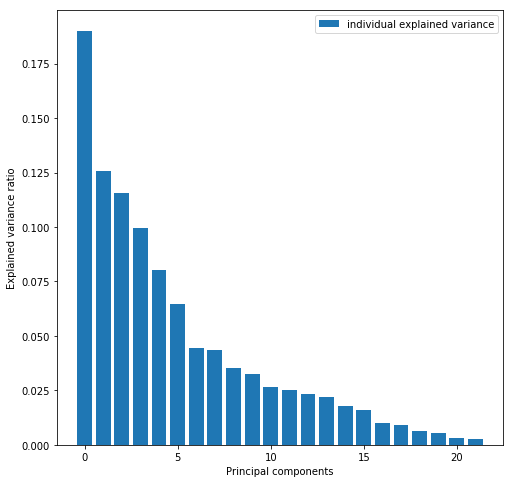

In [56]:
#Below we plot the individual explained variance from the pca analysis.
plt.figure(figsize=(8, 8))

#we plot the explained variance as a barchart and set x and y labels.
plt.bar(range(22), explained_variance,
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

#From the  graph below we can see, that the first 15 pca's explain much 
#variance in the dataset. The last 6 pca's doesn't contribute very much 
#to the overall explanation so we will sort them out.

In [57]:
#We create a new PCA, with pre-defined number of components as 15.
pca = PCA(n_components=15)

#We fit_transform the 'X_scaled' data to pca
X_scaled = pca.fit_transform(X_scaled)

#We print out the sum of the explained variance ratio, to see how much of the
#variance is explained in the pca analysis.
pca.explained_variance_ratio_.sum()

#This shows us, that with a PCA analysis with 15 components, we are able to
#explain 94,68% of the variance in the dataset.

0.9468229342164728

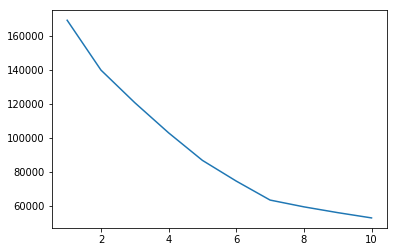

In [58]:
#To perform a cluster analysis we import KMeans from sklearn.cluster.
from sklearn.cluster import KMeans

#We create a 'inertia'-variable as an empty array.
inertia = []

#In the below for-loop we create a KMeans with 'i'-numbers of cluster (from 1 
#to 10, since the set a range equal to 10 units). At the end of each loop, we
#append the fitted KMeans of 'X_scaled' function to the 'inertia' array.
for i in range(1,11):
  k_means = KMeans(n_clusters=i) 
  inertia.append(k_means.fit(X_scaled).inertia_)

#We create a Seaborn lineplot, where y is the 'inertia' array, and x as 
#range of 10
sns.lineplot(y = inertia, x = range(1,11))

#From this lineplot, we can spot a tiny elbow point at the second range.

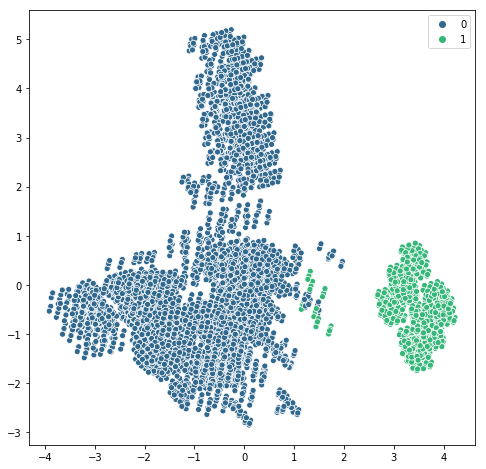

In [59]:
#From the first elbow point of the two clusters we create a new KMeans with two 
#clusters and random state as 42. We create two clusters in order to see if the
#algorithm can separate poisonous and edible mushrooms.
k_means = KMeans(n_clusters=2, random_state=42)
k_means.fit(X_scaled)

plt.figure(figsize=(8,8))

#We create a scatterplot with two clusters.
g = sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue = k_means.labels_, legend='full',
                    palette='viridis')

#Below scatterplot shows the two clusters. 

In [60]:
#We create a new column in the dataset, called 'cluster', which represents which
#cluster each mushroom in represented in. This will in our further analysis 
#give us an indication of whether the clusters is separated in 
#poisonous or edible mushrooms.
data['cluster'] = k_means.labels_
data.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,cluster
0,True,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5,0
1,False,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1,0
2,False,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3,0
3,True,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5,0
4,False,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1,0


In [0]:
#we print out a count of edible and 
#poisonous mushrooms in each cluster using itertools.
import itertools
from collections import Counter

cluster0 = Counter(list(itertools.chain(data[data.cluster == 0]['class']))) 
cluster1 = Counter(list(itertools.chain(data[data.cluster == 1]['class'])))

In [62]:
#Using 'most_common()' method, we print out the number of edible and poisonous
#mushrooms in cluster 0.
cluster0.most_common()

#This show us that all edible mushrooms and ~half of the poisonous mushrooms
#are represented in this cluster.

[(False, 4208), (True, 2160)]

In [63]:
#Using 'most_common()' method, we print out the number of edible and poisonous
#mushrooms in cluster 1.
cluster1.most_common()

#This shows us that 1756 of the poisonous mushrooms are represented in this 
#cluster, and there are no edible mushrooms in this cluster. This must be a sign
#of characteristics that is unique for poisonous mushrooms, but the algorithm 
#was not able to separete the poisonous from the edible mushrooms

[(True, 1756)]

## SUPERVISED MACHINE LEARNING

Train- / Testset preparation

In [0]:
#We define variable 'x' as all rows in the dataset and all columns beside the 
#'class' and 'cluster' columns.
x = data.loc[:, (data.columns != 'class') & (data.columns != 'cluster')]

#We define 'y' as all rows in the dataset and the column 'class'. This is our
#target variable.
y = data.loc[:,'class']

In [0]:
#Import train_test_split from sklearn.model_selection.
from sklearn.model_selection import train_test_split
#Define variables 'X_train', 'X_test', 'y_train', 'y_test' as train_test_split
#function of 'X_scaled, 'y_enc, with test size of 25% and random state as 42
X_train, X_test, y_train, y_test = train_test_split(x, y,
test_size=0.25,
random_state=42)

              precision    recall  f1-score   support

       False       0.95      0.95      0.95      1040
        True       0.95      0.95      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb52efd1400>)

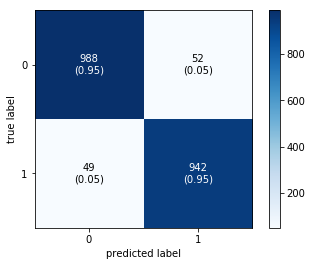

In [66]:
#We import cross_val_score, classification_report and LogisticRegression
#from sklearn.
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

#We define 'model' as LogisticRegression()
model = LogisticRegression()

#Fit the training data to the logistic regression model.
model.fit(X_train, y_train)

#We create 'y_pred' as a prediction of 'X_test' on the logisticregression model
y_pred = model.predict(X_test)

#We print out a classification_report of test data and 'y_pred', to see the
#precision of our datamodel. 
print(classification_report(y_test, y_pred))

#we import confusion_matrix from mlxtend and sklearn, to be able to create a
#confusion matrix.
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#Define variable confmatrix as a confusion matrix of 'y_test' and 'y_pred'
confmatrix = confusion_matrix(y_test,y_pred) 

#Plot the confmatrix variable.
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

#The classification report shows, that the accuracy/precision of the Logistic 
#Regression model is 95%, and it classifies 1040 mushrooms as edible and 
#991 mushrooms as poisonous.

#In the confusion matrix we can evaluate, that the algorithm predicted 1037 
#mushrooms as edible, where 49 were poisonous. Further the algorithm predicted 994
#mushrooms as poisonous, whereas 52 were edible.

In [67]:
#We define 'scores' as cross_val_score function on KNearestNeighbor on 
#training dataset. We set cross-validation number as 5. This means, that the 
#training dataset is divided into (in this case) 5 sets, and runs 5 times, where
#in each run, a new set will be used as test-set.  
scores = cross_val_score(model, X_train, y_train, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [68]:
#Print the mean of the k-fold cross-validation (scores)
print(np.mean(scores))

#This shows us the score (accuracy) on our training dataset as 94,96%. 

0.9496134681985152


              precision    recall  f1-score   support

       False       1.00      0.99      1.00      1040
        True       0.99      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb52efc8c18>)

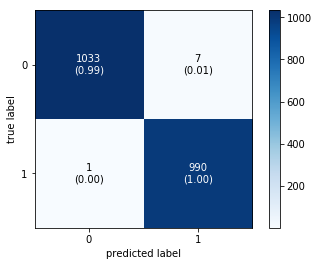

In [69]:
#We import KNearestNeighbor from sklearn as second algorithm.
#This model predicts the value of the testrow based on its nearest neighbors
#value. 
from sklearn.neighbors import KNeighborsClassifier

#We create 'classifies' as KNeighborsClassifier, with number of neighbors as 5.
classifier = KNeighborsClassifier(n_neighbors=5)

#Fit the training set to the KNearestNeighbor model. 
classifier.fit(X_train, y_train)

#We create 'y_pred' as a prediction of 'X_test' on the KNearestNeighbor model
y_pred = classifier.predict(X_test)

#We print out a classification_report of test data and 'y_pred', to see the
#precision of our datamodel. 
print(classification_report(y_test, y_pred))

#Define variable confmatrix as a confusion matrix of 'y_test' and 'y_pred'
confmatrix = confusion_matrix(y_test,y_pred) 

#Plot the confmatrix variable.
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

#The classification report shows, that the accuracy/precision of the  
#KNearestNeighbor model is 100%/99%, and it classifies 1040 mushrooms as edible 
#and 991 mushrooms as poisonous.

#In the confusion matrix, we can evaluate, that the second algorithm predicted 
#1034 mushrooms as edible, where 1 were poisonous. Further 997
#mushrooms was predicted as poisonous and 7 as edible.

In [70]:
#We define 'scores' as cross_val_score function on KNearestNeighbor on the 
#training dataset. We set cross-validation to 5. This means, that the 
#training dataset is divided into (in this case) 5 sets, and runs 5 times, where
#in each run, a new set will be used as test-set.  
scores = cross_val_score(classifier, X_train, y_train, cv=5)

#Print the mean of the k-fold cross-validation (scores)
print(np.mean(scores))

#This shows us the score (accuracy) on our training dataset is 99,81%. 

0.9981945684839519


              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1040
        True       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb52eed8cc0>)

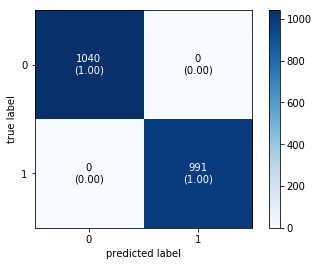

In [71]:
#cross-validation workflow, model fitting, prediction and evaluation 
#for Decision Tree Classifier

#Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

#Define variable 'model' as DecisionTreeClassifier()
tree = DecisionTreeClassifier()

#Fit the 'X' and 'y' values to the tree variable.
tree.fit(X_train, y_train)

#We create 'y_pred' as a prediction of 'X_test' on the DecisionTree model
y_pred = tree.predict(X_test)

#We print out a classification_report of test data and 'y_pred', to see the
#precision of our datamodel. 
print(classification_report(y_test, y_pred))

#Define variable confmatrix as a confusion matrix of 'y_test' and 'y_pred'
confmatrix = confusion_matrix(y_test,y_pred) 

#Plot the confmatrix variable.
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

#The classification report shows, that the accuracy/precision of the  
#DecisionTree model is 100%, and it classifies 1040 mushrooms as edible 
#and 991 mushrooms as poisonous.

#In the confusion matrix, we can evaluate that the algorithm predicted 1040 
#mushrooms as edible and 0 were poisonous. Further the algortihm predicted 991
#mushrooms as poisonous and 0 as edible.

In [72]:
#We define 'scores' as cross_val_score function on KNearestNeighbor on the 
#training dataset. We set cross-validation to 5. This means that the 
#training dataset is divided into (in this case) 5 sets, and runs 5 times, where
#in each run, a new set will be used as test-set.  
scores = cross_val_score(tree, X_train, y_train, cv=5)

#Print the mean of the k-fold cross-validation (scores)
print(np.mean(scores))

#This shows us the score (accuracy) on our training dataset is 100%. 

1.0
